# **MILESTONE 1**



---



- Nama : Afifah Rahma Tifani
- Batch : 015- RMT

Link Dashboard : https://datastudio.google.com/reporting/ef73c803-2b7c-4865-8471-5920631d2241

# **I. Description**

**Objective**

Notebook ini dibuat sebagai jawaban Milestone 1 pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.


**Problem Statement**


Kamu adalah seorang Data Analyst yang akan mengerjakan projek besar untuk menyelesaikan suatu permasalahan client dan client kamu butuh sekali hasil analisa datamu menggunakan statistik dan dashboard visualisasi data untuk membantu mereka menyelesaikan masalah.


# **II. Working Area**

**Problem statement:** 

Mengetahui Kinerja dari Aktivitas Penjualan Seluruh Produk pada Tahun 2019.

**Penjabaran masalah:**

1. Apa produk terlaris pada tahun 2019?
2. Berapakah total sales dan total barang terjual di masing-masing kota?
3. Bagaimanakah trend sales dari bulan ke bulan? Bulan keberapa tercapainya penjualan tertinggi?
4. Pada jam berapa user paling banyak melakukan order?
5. Berapakah rata-rata, median, dan modus dari data *sales*? 
6. Apakah rata-rata produk USB Cable Charger terjual per bulan memiliki *significant difference* dengan rata-rata  produk Lightning Cable Charger terjual per bulan?


##**Answer**

In [ ]:
# Import library

import numpy as np
import pandas as pd

In [ ]:
# Load Dataset 

df = pd.read_csv('/content/all_data.csv')


dataset ini didapatkan dari https://www.kaggle.com/datasets/knightbearr/sales-product-data

In [ ]:
# Menampilkan head dari dataset

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
# Menampilkan tail dari dataset

df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [ ]:
# Melihat info dari dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
# Melihat unique values dari tiap kolom
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

Dengan metode .head, kita dapat melihat fitur-fitur dari dataset yang kita miliki dari nama-nama kolomnya. 
Dan kita juga dapat mengetahui jumlah unique dari setiap kolom.

Selanjutnya akan dilakukan pembersihan data terlebih dahulu.

## **Pembersihan Data**

In [ ]:
# Mendeteksi missing values

df.isnull().sum()


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
# Menghitung persentase missing values 

persentase_mv = df.isnull().sum() * 100 / len(df)
mv_df = pd.DataFrame({'column_name' : df.columns, 'persentase_mv' : persentase_mv})

mv_df

,column_name,persentase_mv
Order ID,Order ID,0.291678
Product,Product,0.291678
Quantity Ordered,Quantity Ordered,0.291678
Price Each,Price Each,0.291678
Order Date,Order Date,0.291678
Purchase Address,Purchase Address,0.291678


Karena persentase missing valuesnya kecil, maka kita akan menghapus baris yang memiliki missing values.

In [ ]:
# Drop missing values

df.dropna(how='any', axis=0, inplace=True)

df = df[df['Order Date'].str[0:2] != 'Or']

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [ ]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##**Pre-Processing Data**

Untuk menjawab problem statement, kita perlu menambahkan beberapa kolom, yaitu sales, kota, dan time-related columns.

In [ ]:
# Membuat kolom tahun, bulan, jam, dan menit

# Mengubah order date menjadi datetime agar bisa dengan mudah membuat kolom tanggal dan waktu
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
df['Year']= df['Order Date'].dt.year
df['Month']= df['Order Date'].dt.month
df['Hour']= df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute
df['Order Date']=df['Order Date'].dt.date


In [ ]:
# Membuat kolom baru Sales

# Mengubah tipe data kolom quantity dan price agar dapat dilakukan perkalian

df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')

df['Sales']= df['Quantity Ordered'] * df['Price Each']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales
0,236670,Wired Headphones,2,11.99,2019-08-31,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99
2,236672,iPhone,1,700.00,2019-08-06,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68


In [ ]:
# Membuat kolom kota dan state

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])

df

In [ ]:
pip install geocoder

In [ ]:
import geocoder
import pandas as pd
import requests

In [ ]:
# Mengecek nununique

df.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date             366
Purchase Address    140787
Year                     2
Month                   12
Hour                    24
Minute                  60
Sales                   54
City                     9
State                    8
dtype: int64

In [ ]:
# Melihat persebaran data pada kolom tahun

df['Year'].value_counts()

2019    185916
2020        34
Name: Year, dtype: int64

In [ ]:
#  Drop data tahun 2020
"""Sesuai problem statement, kita hanya menganalisis data tahun 2019"""

df_1 = df.drop(df[df['Year'] == 2020].index)

df_1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,City,State
0,236670,Wired Headphones,2,11.99,2019-08-31,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle,WA
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas,TX
2,236672,iPhone,1,700.00,2019-08-06,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland,OR
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles,CA
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11,"14 Madison St, San Francisco, CA 94016",2019,12,20,58,14.95,San Francisco,CA
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01,"549 Willow St, Los Angeles, CA 90001",2019,12,12,1,7.68,Los Angeles,CA
186847,319668,Vareebadd Phone,1,400.00,2019-12-09,"273 Wilson St, Seattle, WA 98101",2019,12,6,43,400.00,Seattle,WA
186848,319669,Wired Headphones,1,11.99,2019-12-03,"778 River St, Dallas, TX 75001",2019,12,10,39,11.99,Dallas,TX


In [ ]:
df_1.describe()

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,185916.000000,185916.000000,185916.0,185916.000000,185916.000000,185916.000000,185916.000000
mean,1.124368,184.387720,2019.0,7.060248,14.415661,29.481744,185.478203
std,0.442749,332.722426,0.0,3.502358,5.421069,17.317339,332.911130
min,1.000000,2.990000,2019.0,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.0,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.0,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.0,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2019.0,12.000000,23.000000,59.000000,3400.000000


In [ ]:
# save dataset

df_1.to_csv('/content/sample_data/sales_product.csv', index = False)

## **Nomor 1: Produk terlaris pada tahun 2019?**

In [ ]:
top_product = df_1.groupby(['Product']).sum()['Quantity Ordered'].sort_values(ascending=False)

top_product


Product
AAA Batteries (4-pack)        31012
AA Batteries (4-pack)         27635
USB-C Charging Cable          23971
Lightning Charging Cable      23211
Wired Headphones              20553
Apple Airpods Headphones      15657
Bose SoundSport Headphones    13454
27in FHD Monitor               7547
iPhone                         6847
27in 4K Gaming Monitor         6243
34in Ultrawide Monitor         6199
Google Phone                   5531
Flatscreen TV                  4818
Macbook Pro Laptop             4727
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2067
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [ ]:
# Import Library

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Text(0, 0.5, 'Quantity Ordered')

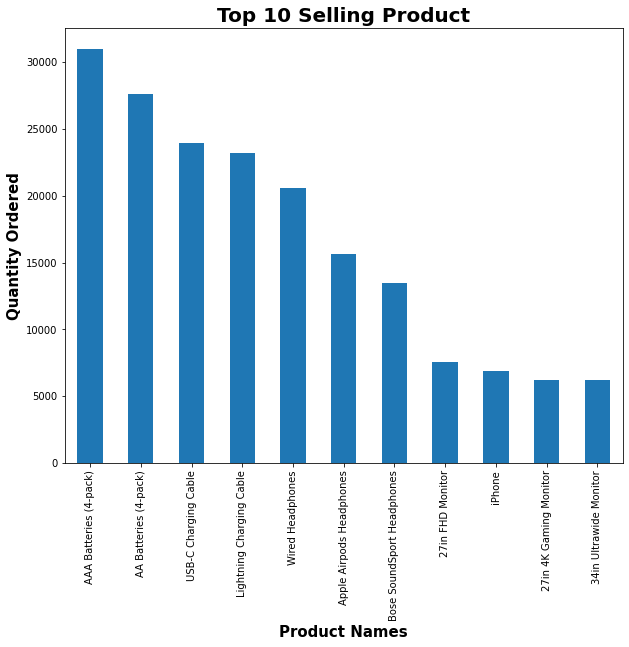

In [ ]:
# Memplot pada Bar - Chart

figure(figsize=(10, 8)) #Membuat size figure

top_product[:11].plot(kind='bar', title= 'Top 10 Selling Products')

plt.title("Top 10 Selling Product", weight="bold", fontsize=20)

plt.xlabel("Product Names", weight="bold",  fontsize=15, color="black")

plt.ylabel( "Quantity Ordered", weight="bold", color="black", fontsize=15)

**Insight**:

- Dari visualisasi diatas, produk yang terjual paling banyak pada tahun 2019 adalah AAA Batteries(4-Pack) dengan total 31.012 unit terjual.
- Sedangkan, penjualan produk dengan penjualan terendah adalah LG dryer dengan total 646 unit terjual.

## **Nomor 2: Berapakah total *sales* dan total barang terjual di masing-masing kota?**

In [ ]:
city_sales = df_1.groupby(['City'])['Sales','Quantity Ordered'].sum().sort_values(by='Sales', ascending=False)

city_sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Quantity Ordered
City,,
San Francisco,8259719.03,50226
Los Angeles,5451570.81,33288
New York City,4662976.81,27916
Boston,3660315.12,22524
Atlanta,2795498.58,16602
Dallas,2766260.45,16728
Seattle,2747605.49,16552
Portland,2320337.62,14051
Austin,1819081.77,11151


Text(0.5, 1.0, 'Quantity Ordered in Cities')

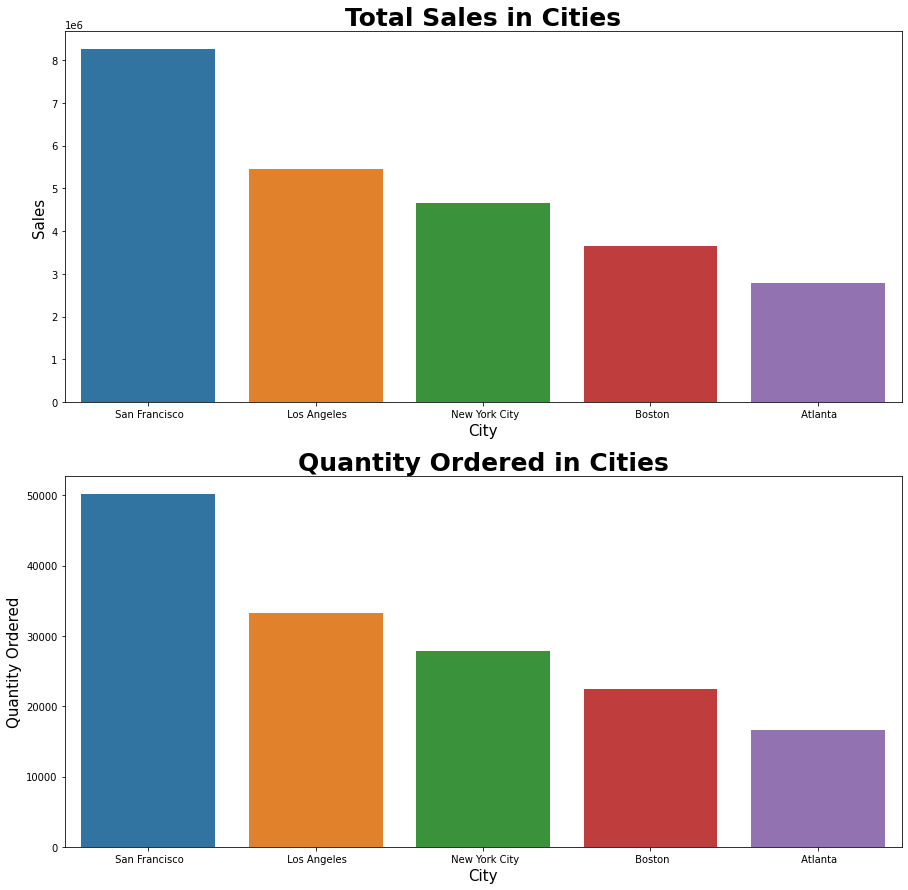

In [ ]:
# Melakukan plot pada Bar-Chart

data = df_1.groupby(['City']).sum().sort_values(by= 'Sales', ascending=False).reset_index()

#
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(x='City', y='Sales', data=data[:5], ax=ax[0])
ax[0].set_xlabel(ax[0].get_xlabel(), size=15)
ax[0].set_ylabel(ax[0].get_ylabel(), size=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), size=10)
ax[0].set_title('Total Sales in Cities', weight='bold', size= 25)

# -------


sns.barplot(x='City', y='Quantity Ordered', data=data[:5], ax=ax[1])
ax[1].set_xlabel(ax[1].get_xlabel(), size=15)
ax[1].set_ylabel(ax[1].get_ylabel(), size=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), size=10)
ax[1].set_title('Quantity Ordered in Cities', weight='bold', size= 25)



**Insight:**

Kota dengan total *sales* tertinggi dari visualisasi diatas yaitu San Francisco yaitu mencapai $8,259,719, dimana jumlah produk yang terjual yaitu sebanyak 50226 unit.

## **Nomor 3: Bagaimana trend *sales* dari bulan ke bulan? Pada bulan keberapa tercapai angka *sales* tertinggi?**

In [ ]:
month_sales = df_1.groupby(['Month'])['Sales'].sum().reset_index()

month_sales

,Month,Sales
0,1,1813586.44
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


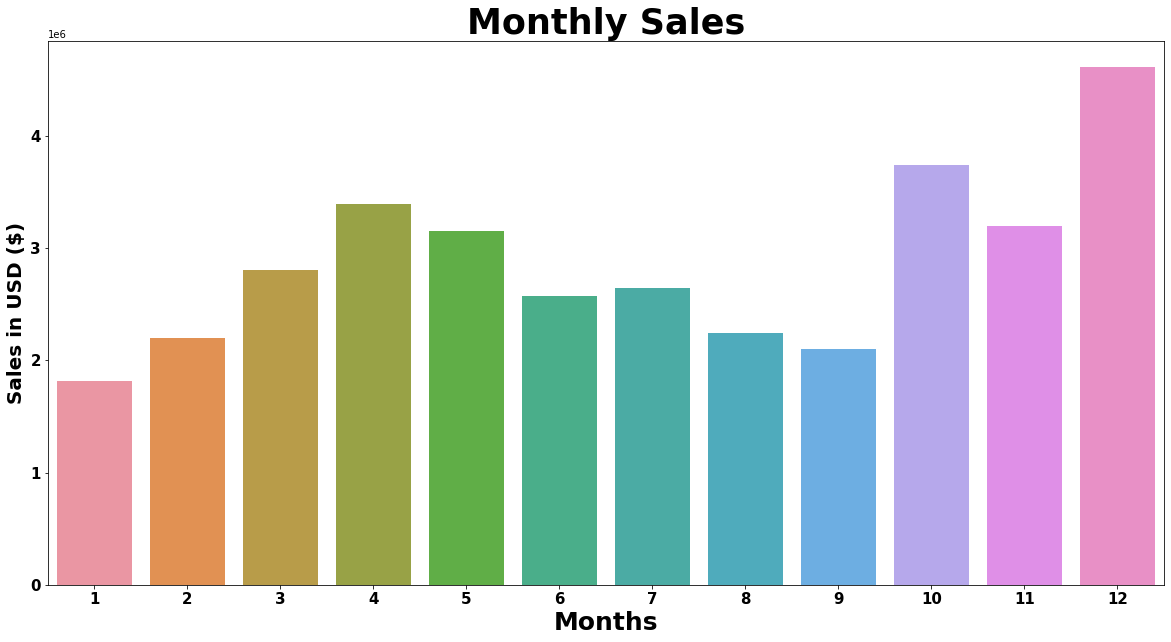

In [ ]:
plt.figure(figsize=(20, 10))
# makes bar plot 
sns.barplot(  x=month_sales['Month'], y=month_sales["Sales"], data=month_sales)
plt.title( "Monthly Sales",  weight="bold",fontsize=35)

plt.xlabel("Months", weight="bold", fontsize=25)

plt.xticks(weight="bold", fontsize=15)

plt.ylabel("Sales in USD ($)", weight="bold",fontsize=20)
plt.yticks( weight="bold",fontsize=15);

**Insight:**


Berdasarkan visualisasi diatas, bulan dengan penjualan tertinggi adalah bulan Desember, dimana penjualan pada bulan ini mencapai $4,613,443.

## **Nomor 4: Jam ketika user paling banyak melakukan order?**

In [ ]:
rush_time = pd.concat([df_1.groupby(['Hour'])['Order ID'].count(), df_1.groupby(['Hour'])['Sales'].sum()], axis = 1).reset_index().rename(columns = {'Order ID' : 'Number of Orders', 'Sales' : 'Total  Sales'})

rush_time

,Hour,Number of Orders,Total Sales
0,0,3898,711060.59
1,1,2341,458561.97
2,2,1239,232586.50
3,3,828,144697.99
4,4,850,162396.09
5,5,1319,230564.88
6,6,2482,448113.00
7,7,4011,744854.12
8,8,6256,1192348.97
9,9,8748,1639030.58


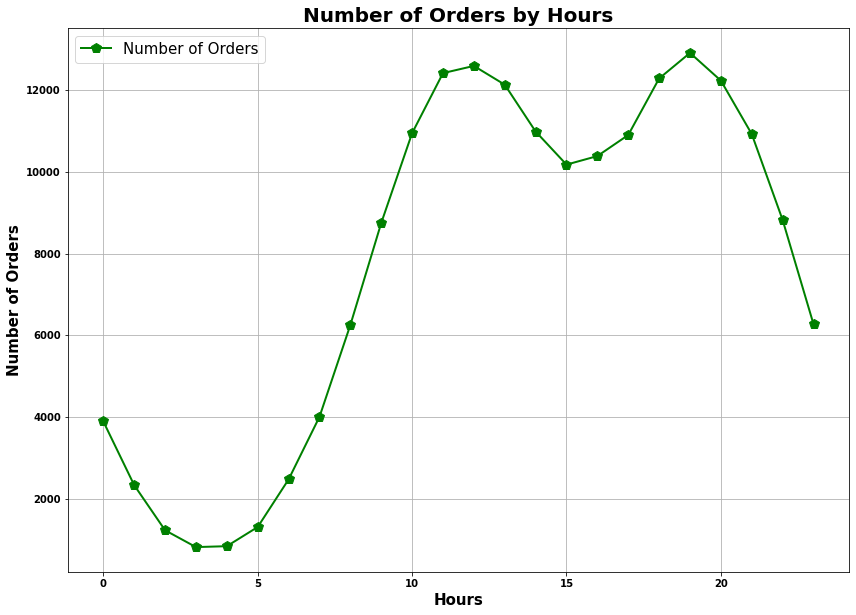

In [ ]:
figure(figsize=(14, 10))

plt.plot(rush_time['Hour'], rush_time['Number of Orders'], '-p', color='green', markerfacecolor='green', 
             markersize=10, linewidth=2, label = "Number of Orders")

plt.grid(True)
plt.title("Number of Orders by Hours", weight='bold', fontsize=20)
plt.xlabel('Hours', weight='bold', fontsize=15)
plt.xticks(weight="bold", fontsize=10)
plt.ylabel("Number of Orders", weight="bold", color="black", fontsize=15)
plt.yticks( weight="bold",fontsize=10);
plt.legend(fontsize=15)

**Insight:**

Jam ketika user paling banyak melakukan order adalah jam 19.00 dan jam 12.00 siang.

##**Nomor 5: Berapakah rata-rata, median, dan modus dari data *sales* tiap bulannya?**

In [ ]:
mean= df_1.groupby(['Month'])['Sales'].mean().rename('mean of sales')

mean

Month
1     187.450795
2     183.884962
3     185.250471
4     185.495390
5     190.305852
6     190.187565
7     185.249826
8     187.648849
9     180.497387
10    184.238580
11    182.074956
12    184.655913
Name: mean of sales, dtype: float64

In [ ]:
median = df_1.groupby(['Month'])['Sales'].median().rename('median of sales')

median

Month
1     14.95
2     14.95
3     14.95
4     14.95
5     14.95
6     14.95
7     14.95
8     14.95
9     14.95
10    14.95
11    14.95
12    14.95
Name: median of sales, dtype: float64

In [ ]:
mode = df_1.groupby(['Month'])['Sales'].apply(pd.Series.mode)

mode

Month   
1      0    11.95
2      0    11.95
3      0    14.95
4      0    14.95
5      0    14.95
6      0    14.95
7      0    14.95
8      0    14.95
9      0    11.95
10     0    14.95
11     0    14.95
12     0    11.95
Name: Sales, dtype: float64

In [ ]:
central_tendency= pd.concat([mean, median], axis=1)

central_tendency

,mean of sales,median of sales
Month,,
1,187.450795,14.95
2,183.884962,14.95
3,185.250471,14.95
4,185.495390,14.95
5,190.305852,14.95
6,190.187565,14.95
7,185.249826,14.95
8,187.648849,14.95
9,180.497387,14.95


**Insight:**

- Beberapa insight yang bisa disampaikan adalah rata-rata penjualan tiap bulannya, nilai tengah penjualan tiap bulannya, dan angka penjualan yang sering muncul pada tiap bulannya.
- Kecendrungan pemusatan datanya adalah nilai modus < median < mean yang artinya kurva distribusi yang terbentuk adalah *right-skewed*.

##**Analisa Uji Hipotesis**


Kita Ingin mengecek apakah rata-rata jumlah produk terjual per bulan pada produk USB-C Charging Cable dan produk Lightning Charging Cable *significantly different* atau tidak, dengan menggunakan two samples independent two tailed test.

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,City,State
0,236670,Wired Headphones,2,11.99,2019-08-31,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle,WA
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas,TX
2,236672,iPhone,1,700.00,2019-08-06,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland,OR
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles,CA
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City,NY


In [ ]:
usb_cab = df_1[df_1['Product'] == 'USB-C Charging Cable'][['Month', 'Quantity Ordered']].groupby('Month').sum()

usb_cab

,Quantity Ordered
Month,
1,1283
2,1654
3,1944
4,2269
5,2068
6,1675
7,1849
8,1462
9,1594


In [ ]:
light_cab = df_1[df_1['Product'] == 'Lightning Charging Cable'][['Month', 'Quantity Ordered']].groupby('Month').sum()

light_cab

,Quantity Ordered
Month,
1,1149
2,1499
3,1873
4,2373
5,2075
6,1687
7,1811
8,1443
9,1432


In [ ]:
print('Rata-rata produk  USB Charging Cable terjual per bulan: {} '.format(usb_cab['Quantity Ordered'].mean()))
print('Rata-rata produk  Lightning  Charging Cable terjual per bulan: {} '.format(light_cab['Quantity Ordered'].mean()))

Rata-rata produk  USB Charging Cable terjual per bulan: 1997.5833333333333 
Rata-rata produk  Lightning  Charging Cable terjual per bulan: 1934.25 


Hipotesis dalam kasus ini:

**H0: μ_usb_cab = μ_light_cab**


**H1: μ_usb_cab != μ_light_cab**

In [ ]:
t_stat, p_val = stats.ttest_ind(usb_cab,light_cab)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.7824021079614024
t-statistics: 0.2795923020950818


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


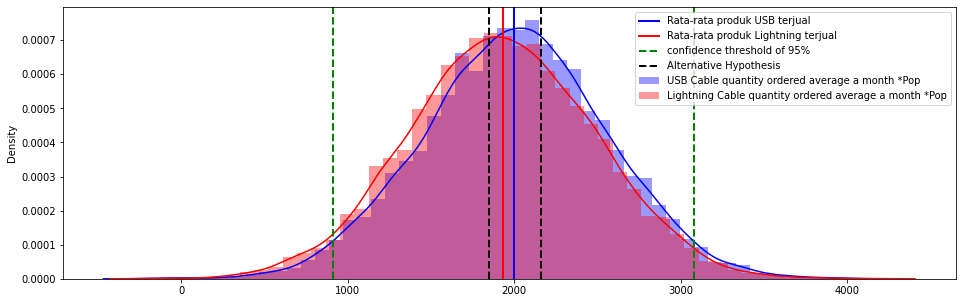

In [ ]:
usb_pop = np.random.normal(usb_cab['Quantity Ordered'].mean(),usb_cab['Quantity Ordered'].std(),10000)
light_pop = np.random.normal(light_cab['Quantity Ordered'].mean(),light_cab['Quantity Ordered'].std(),10000)

ci = stats.norm.interval(0.95,usb_cab['Quantity Ordered'].mean(), usb_cab['Quantity Ordered'].std())
plt.figure(figsize=(16,5))
sns.distplot(usb_pop, label='USB Cable quantity ordered average a month *Pop',color='blue')
sns.distplot(light_pop, label='Lightning Cable quantity ordered average a month *Pop',color='red')

plt.axvline(usb_cab['Quantity Ordered'].mean(), color='blue', linewidth=2, label='Rata-rata produk USB terjual')
plt.axvline(light_cab['Quantity Ordered'].mean(), color='red',  linewidth=2, label='Rata-rata produk Lightning terjual')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(usb_pop.mean()+t_stat[0]*usb_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(usb_pop.mean()-t_stat[0]*usb_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Dari hasil diatas, dapat diketahui bahwa:

- Nilai p-value jauh lebih besar dari significance level.
- Garis alternative hypothesis berada di daerah terima H0.
- Karena kedua hasil diatas, dapat disimpulkan bahwa kita gagal menolak H0.

# **III. Overall Analysis**

- Pada analisis ini, kita ingin mengetahui kinerja aktivitas penjualan seluruh produk pada tahun 2019. Hal ini dilakukan agar kita dapat membuat keputusan terkait aktivitas penjualan di masa depan.

- Dari analisis diatas, dapat diketahui:
  - data pada tahun 2020 terlalu sedikit sehingga kita tidak dapat membandingkan aktivitas penjualan antar tahunnya. 
  - tahun 2019, bulan dengan penjualan tertinggi adalah bulan Desember yang mencapai total penjualan sebesar $4,613,443. 
  - Kota dengan total sales terbanyak adalah di Kota San Francisco.
  - Produk yang terjual paling banyak adalah AAA Batteries (4-pack), AA Batteries (4-Pack), USB Charging Cable, dan Lightning Charging Cable.
  - Waktu dimana paling banyak user melakukan order adalah pada jam 7 malam dan jam 12 siang.

- Rekomendasi:
  - Tim marketing membuat banyak promo pada bulan dengan tingkat sales tinggi, khususnya di bulan Desember.
  - Mengiklankan ad pada jam-jam dimana user banyak melakukan order.
  - Melakukan analisis lebih lanjut mengenai hubungan antara parameter-parameter (kota, harga,dll.) terhadap total sales.